# Explore here

In [20]:
import pandas as pd
og_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

In [21]:
og_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [22]:
og_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
og_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [24]:
og_data.duplicated().sum()

0

In [25]:
og_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pregnancies
Skew : 0.9


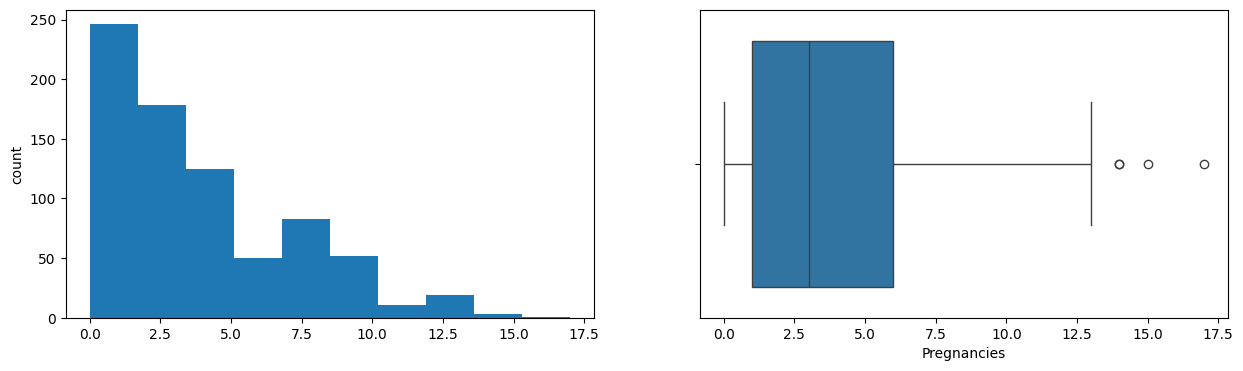

Glucose
Skew : 0.17


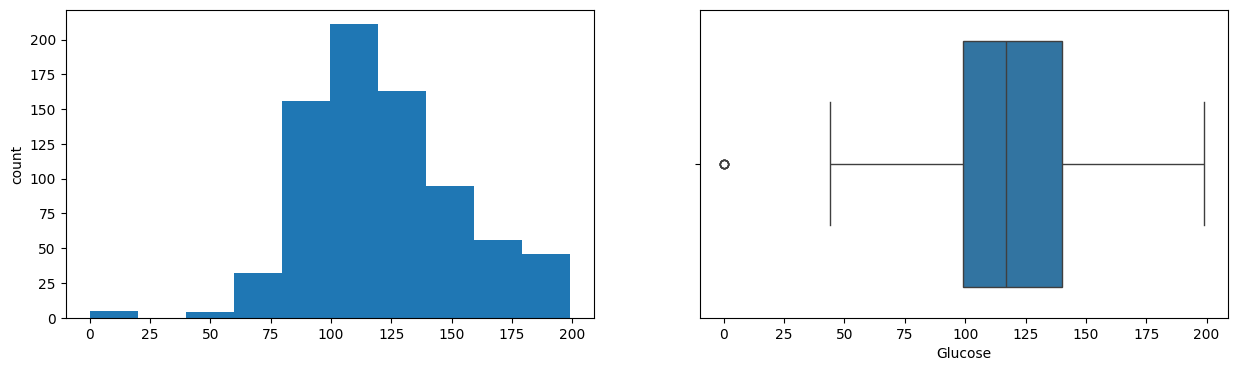

BloodPressure
Skew : -1.84


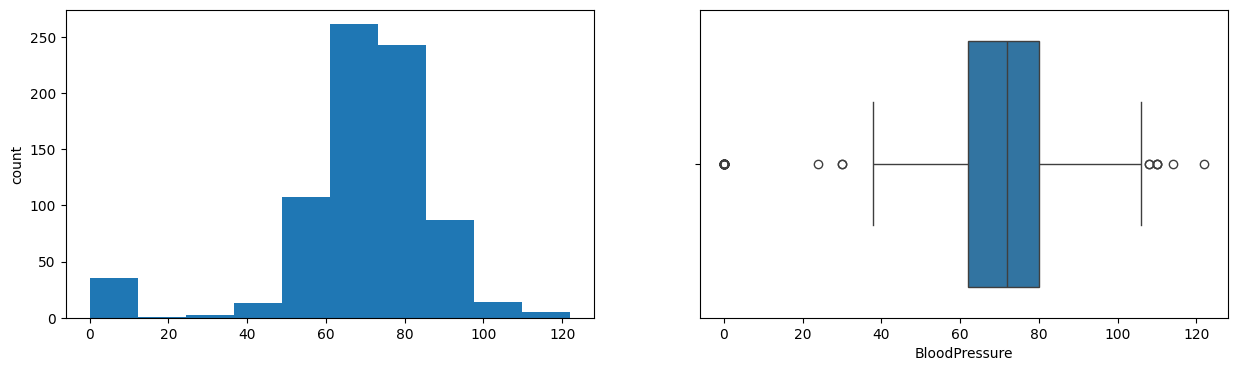

SkinThickness
Skew : 0.11


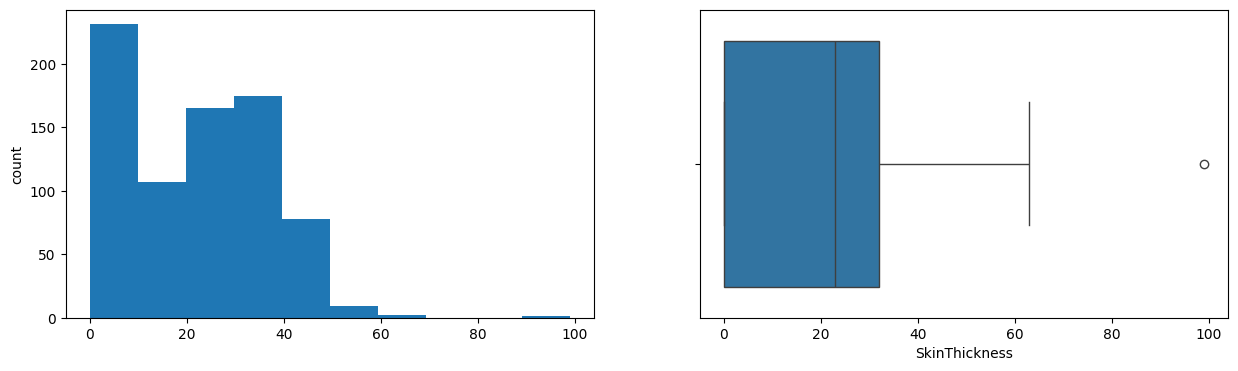

Insulin
Skew : 2.27


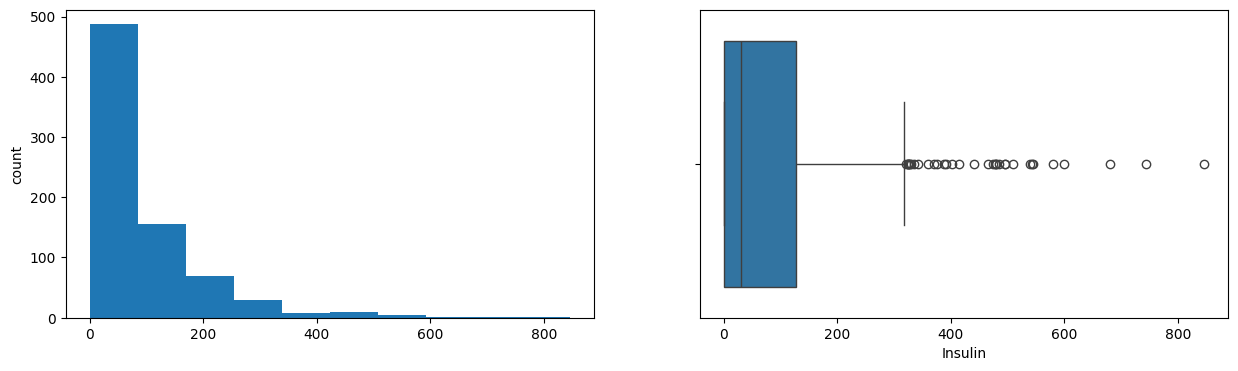

BMI
Skew : -0.43


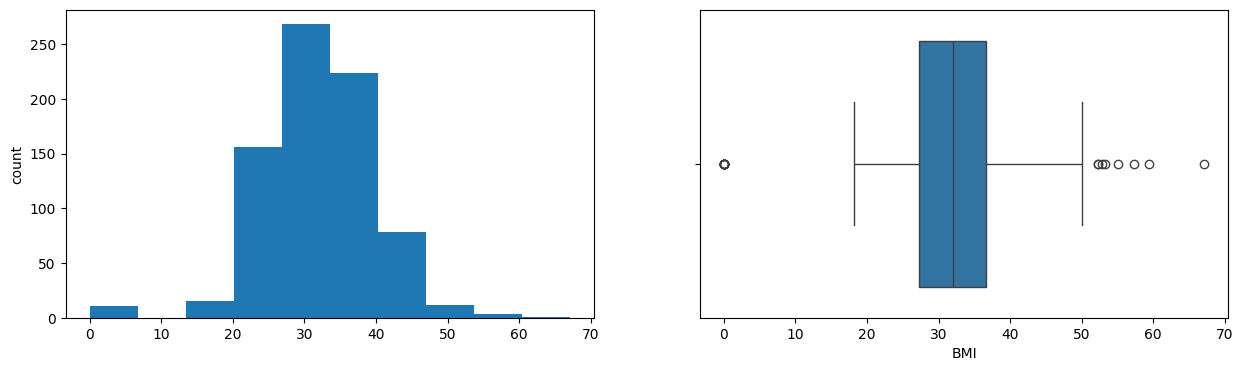

DiabetesPedigreeFunction
Skew : 1.92


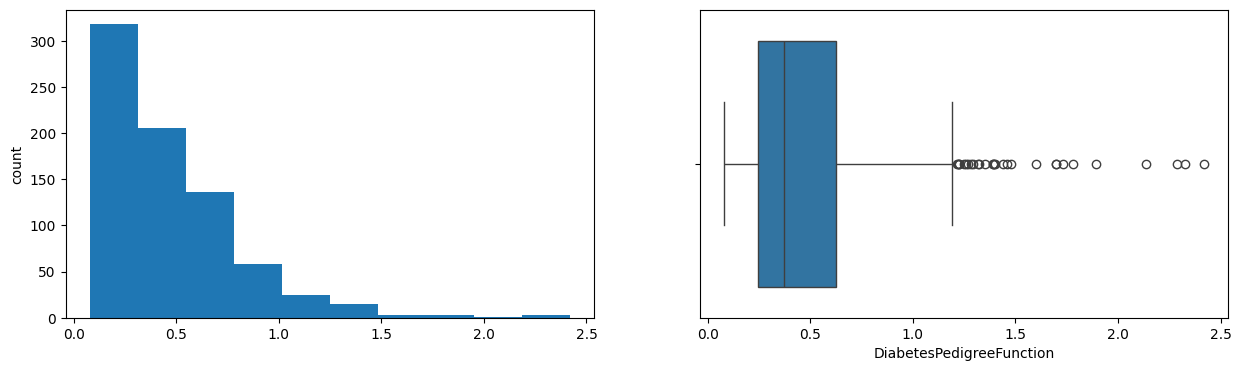

Age
Skew : 1.13


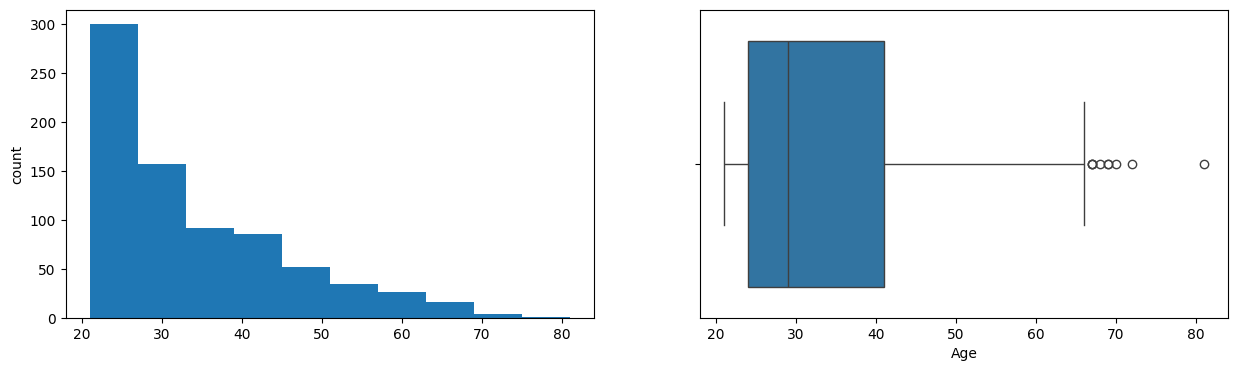

Outcome
Skew : 0.64


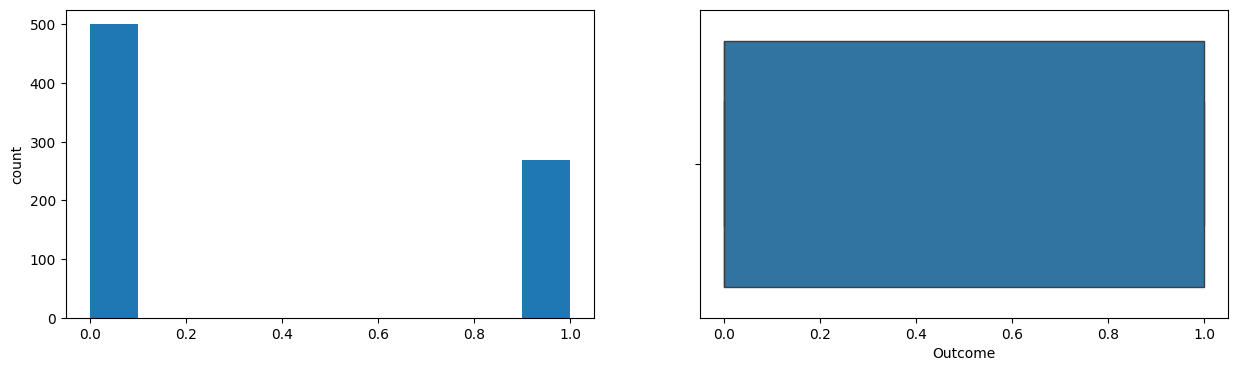

In [27]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

columns = og_data.select_dtypes(include=np.number).columns.tolist()
for col in columns:
    print(col)
    print('Skew :', round(og_data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    og_data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=og_data[col])
    plt.show()

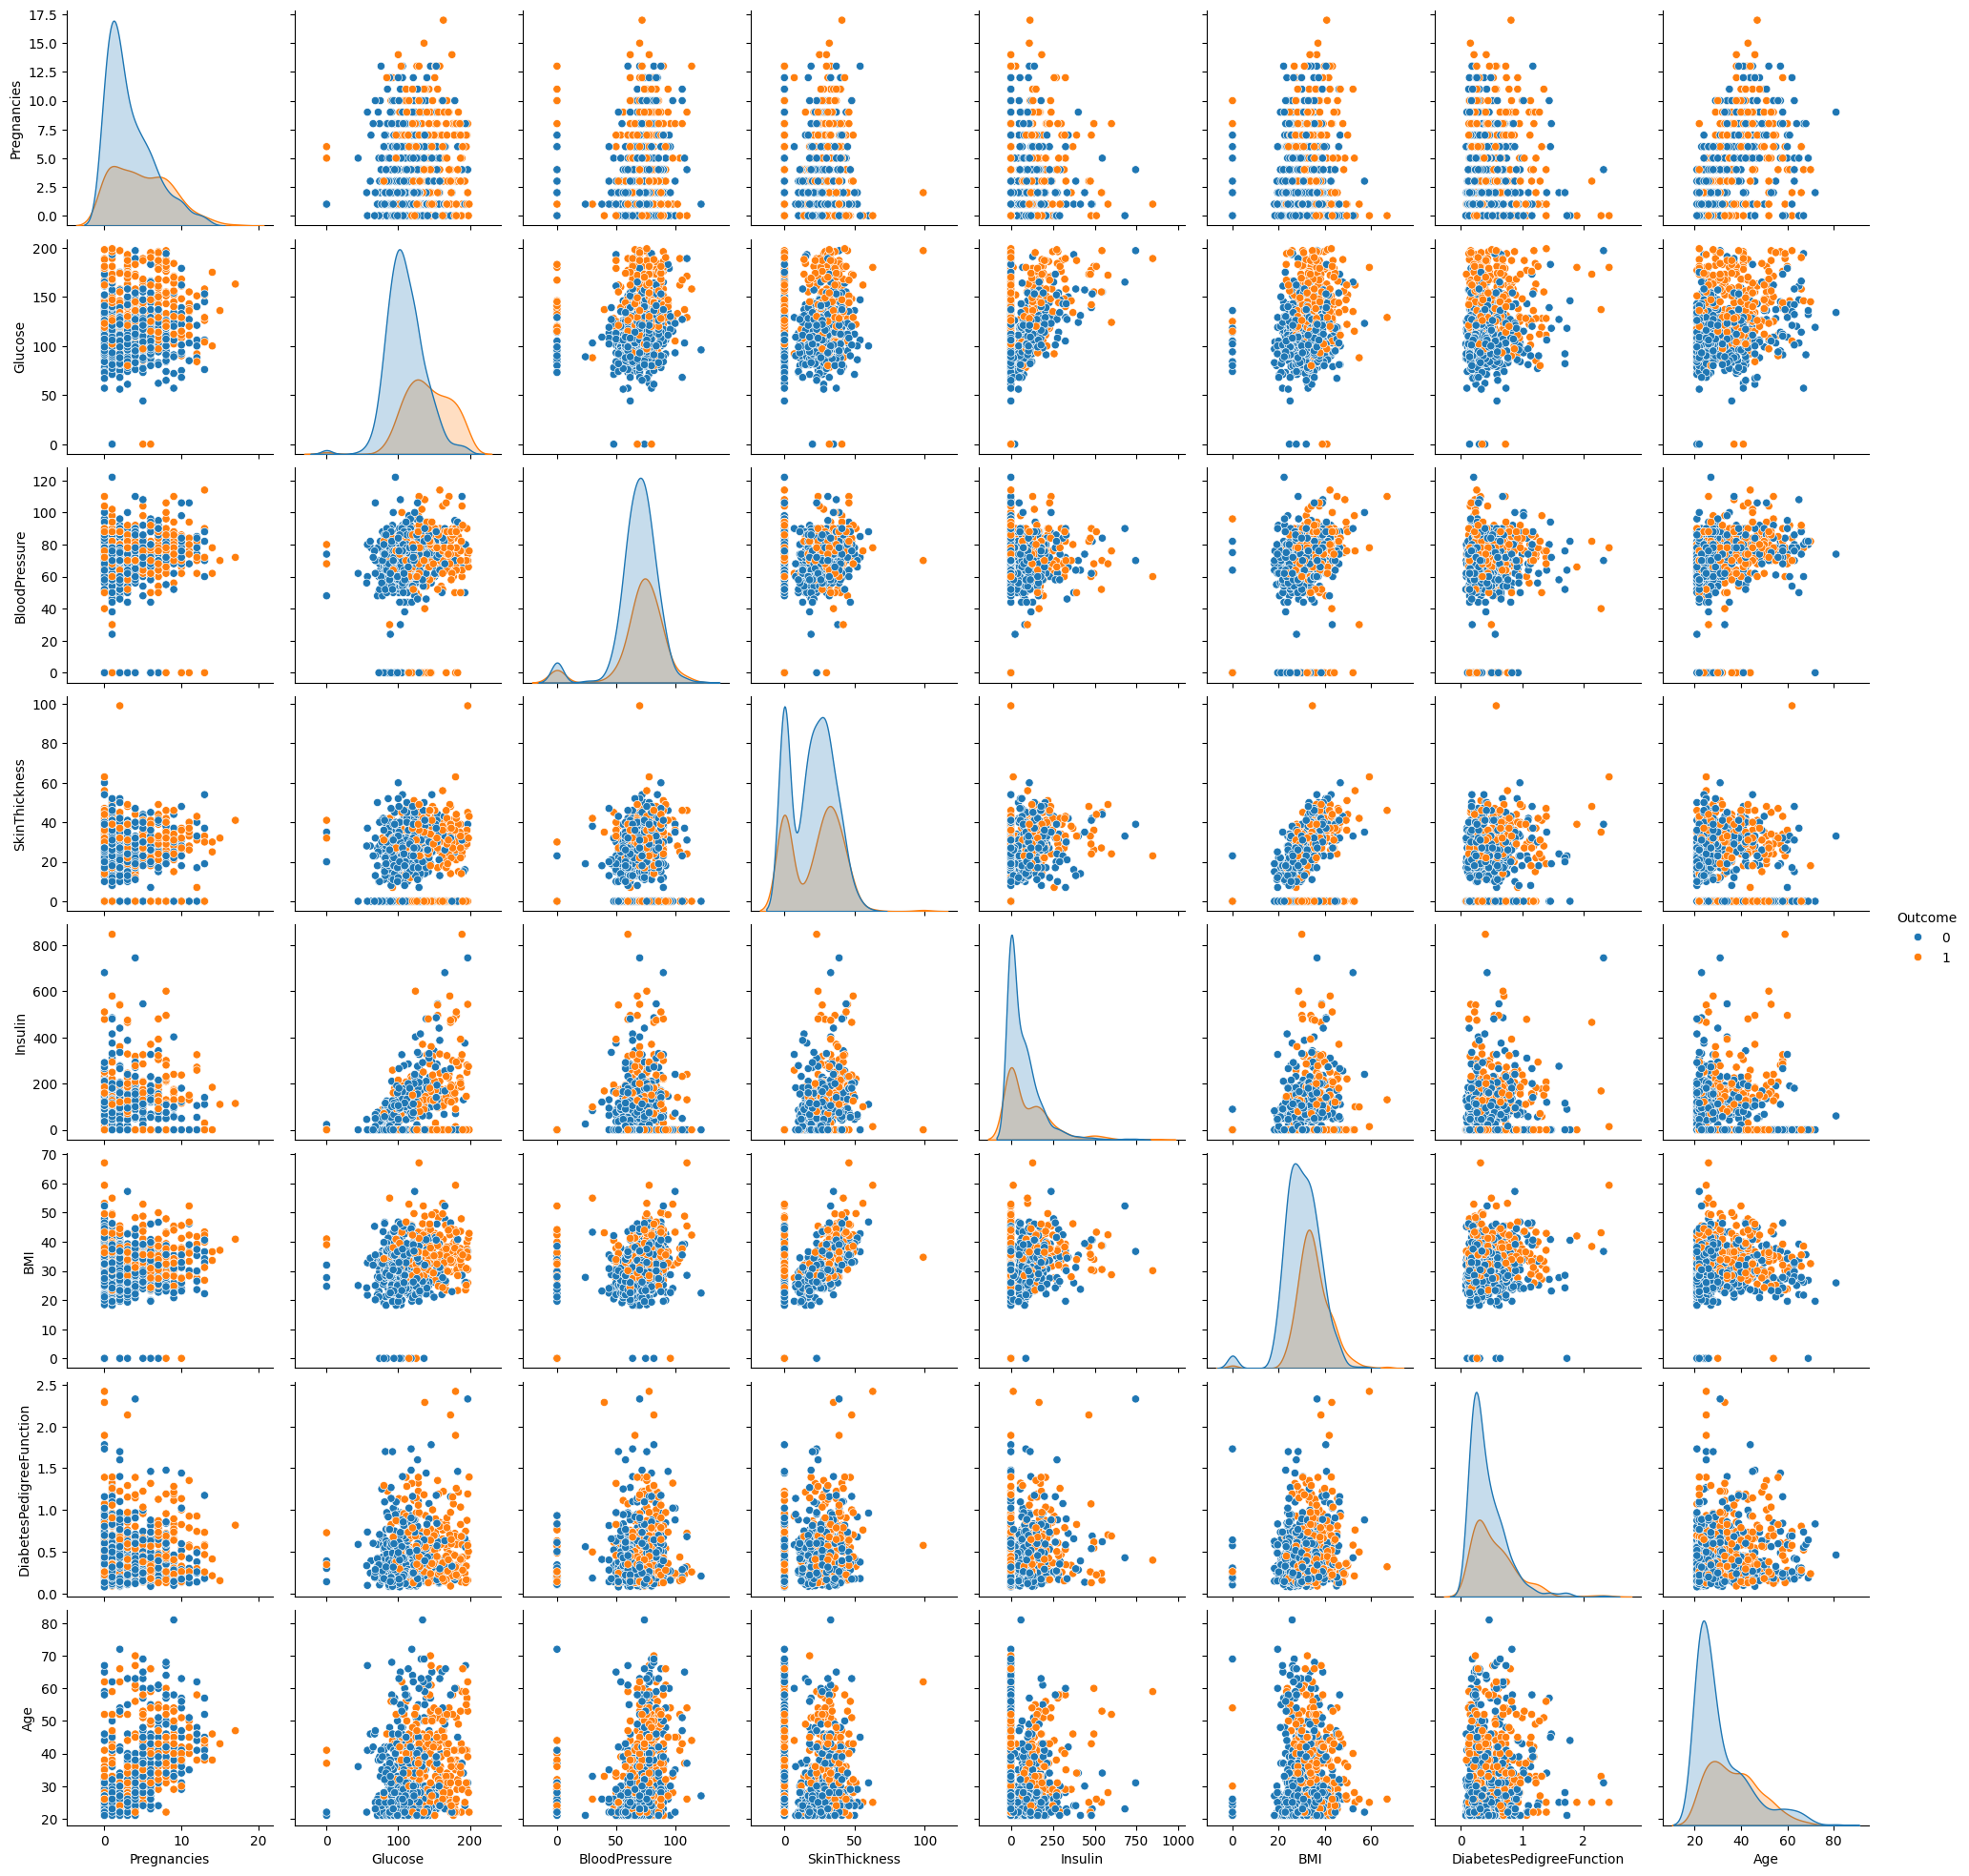

In [28]:
import seaborn as sns
sns.pairplot(og_data, hue='Outcome')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

X = og_data.drop('Outcome', axis =1)
y = og_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.feature_selection import SelectKBest, chi2

#k=all variables at first 

all_columns = SelectKBest(score_func=chi2, k=5)
X_new = all_columns.fit_transform(X_train, y_train)

In [31]:
selected_features = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']

X = og_data[selected_features]
y = og_data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#model 1 with default all max_depth
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
#model 1 prediction
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Accuracy: 0.6753246753246753
Confusion Matrix:
[[72 27]
 [23 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74        99
           1       0.54      0.58      0.56        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



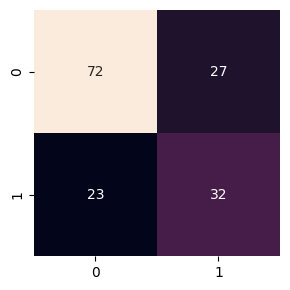

In [34]:
#model 1 accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


from sklearn.metrics import confusion_matrix
model1_cm= confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(model1_cm)
plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(150,150))
plot_tree(model, feature_names=selected_features, filled=True, class_names=['0', '1'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [36]:
#model 2 to check change in accuracy with a max_depth

from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=4)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [37]:
#model 2 prediction
y_pred = model2.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

Accuracy: 0.7012987012987013
Confusion Matrix:
[[70 29]
 [17 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        99
           1       0.57      0.69      0.62        55

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



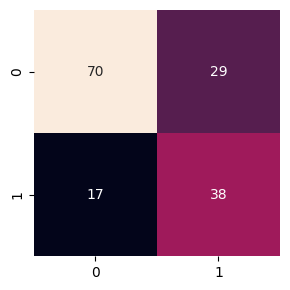

In [38]:
#model 2 accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


from sklearn.metrics import confusion_matrix
model2_cm= confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(model2_cm)
plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

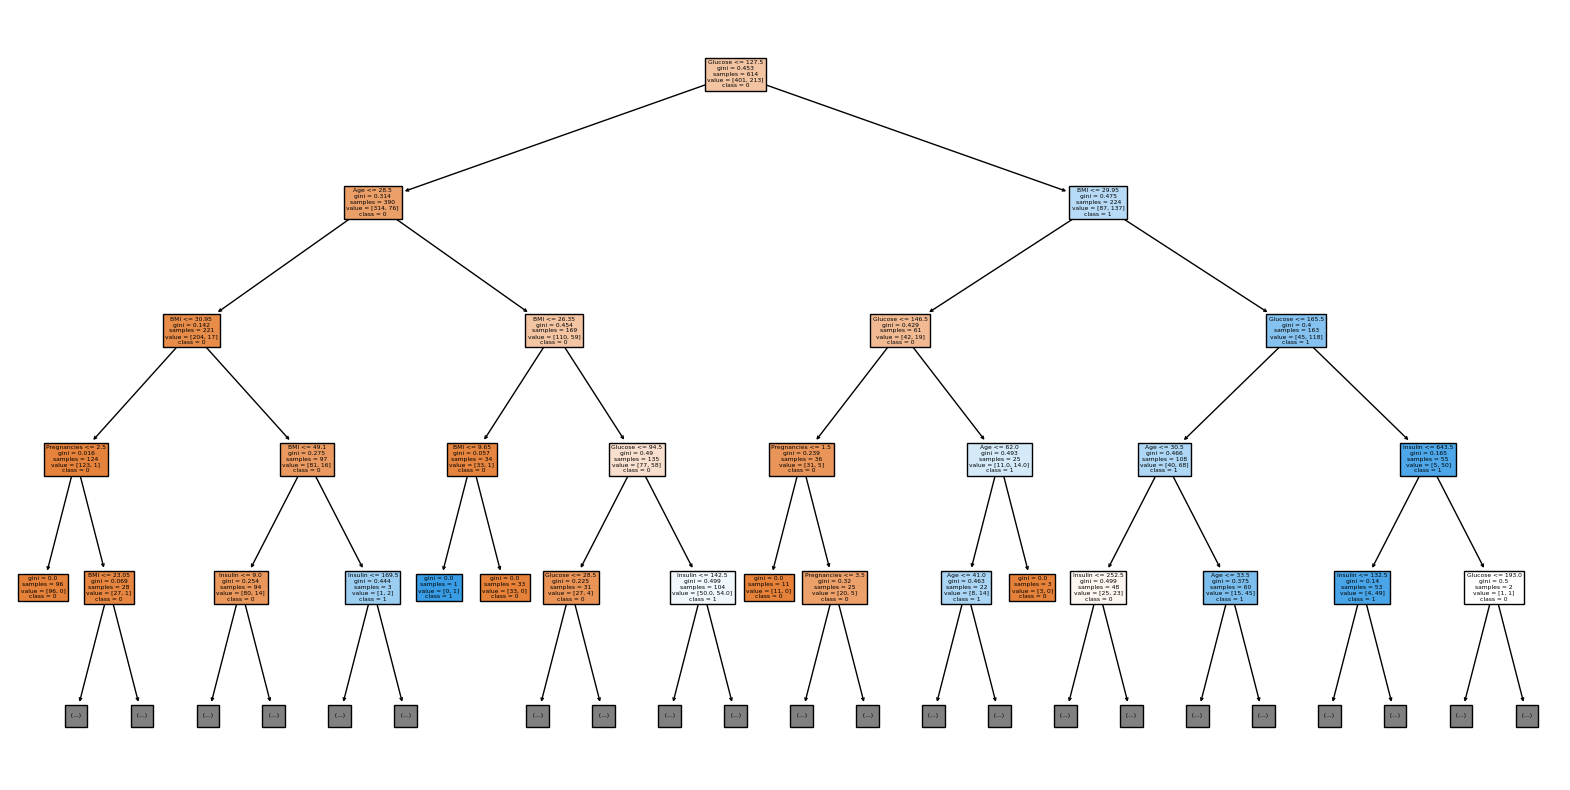

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, max_depth = 4, feature_names=selected_features, filled=True, class_names=['0', '1'])
plt.show

In [41]:
#attempting to find the optimum max_depth for best accuracy - got lost 
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'criterion': ['gini', 'entropy'],  
    'splitter': ['best', 'random'],  
    'max_depth': [None, 5, 10, 15,20], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
}

model = DecisionTreeClassifier()
grid = GridSearchCV(model, hyperparameters, scoring='accuracy', cv=10)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best score: 0.7671602326811211


In [52]:
from pickle import dump
hyperparameters_file = open('hyperparameters.sav', 'wb')
dump(hyperparameters, hyperparameters_file)

In [50]:
grid.fit(X_train, y_train)
y_predict = grid.predict(X_test)

actual_score = accuracy_score(y_test, y_predict)
print(actual_score)


0.7662337662337663
